# Modularity



For this lecture, we are going to use the chapter Text and Annotations from Chapter 4 in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). Notice that you can download the notebook from this chapter if you go to the associated [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb) page. Please download that notebook, since we are going to walk though it and restructure it a little bit. 

````{note}
Besides the notebook, you will need to retrieve the associated data for it. You can do this by using the `wget` command 
```bash
wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv
```
````

Now, let's run the code inside this notebook. One of the first lines of code just creates a figure with some labels:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/tmp/ipykernel_387/337421544.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


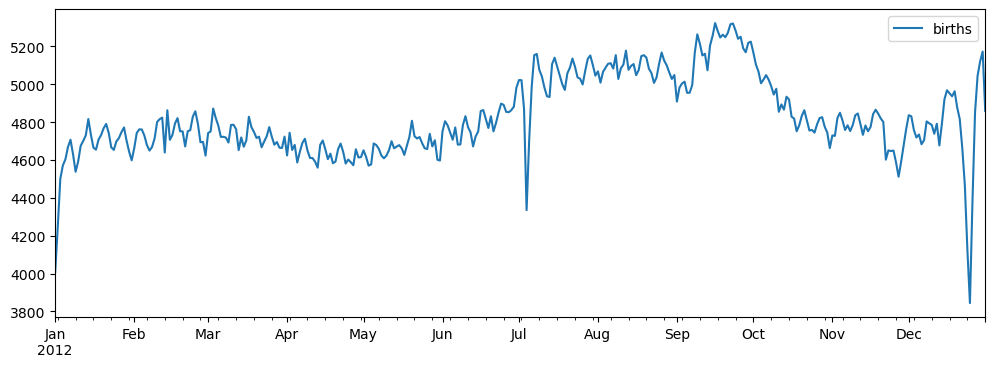

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

This piece of code seems pretty decent. The problem is what happens the next time we need to make a plot that looks very similar to this one. 

```{tip}
At the moment we start repeating our code, even just twice, that is the exactly same moment when we need to start thinking about creating a function with the right arguments that does the same operation but that also we can re-utilize in the future. 
```

The advantages of doing this go beyond just removing repetition in our code. Having our code organized inside small functions makes easier to test each module of our code. If in the future we change the code, we don't need to check all the times that piece of code is utilized, because the changes inside the function affect every single call of the function.

It is very simple to put code inside a function: 

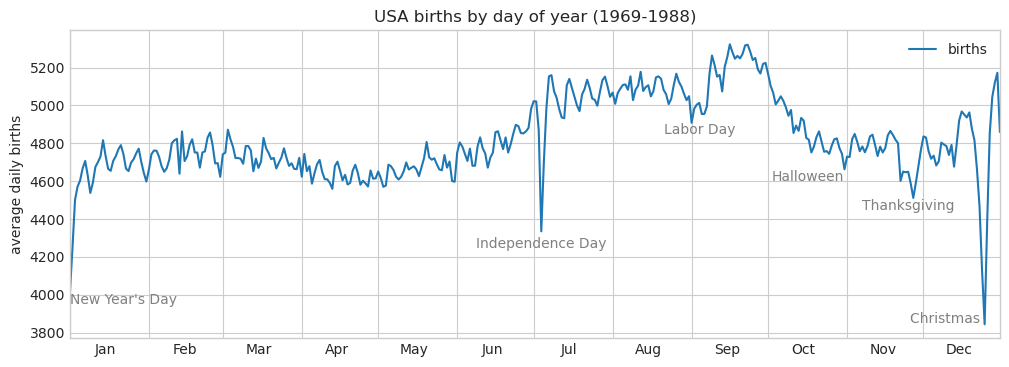

In [14]:
def plot_birds():
    
    fig, ax = plt.subplots(figsize=(12, 4))
    births_by_date.plot(ax=ax);
    
    style = dict(size=10, color='gray')

    ax.text('2012-1-1', 3950, "New Year's Day", **style)
    ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
    ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
    ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
    ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
    ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

    # Label the axes
    ax.set(title='USA births by day of year (1969-1988)',
           ylabel='average daily births')

    # Format the x axis with centered month labels
    ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
    ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

    
plot_birds()

However, there are many problems with the previous way of creating functions. In principle, this doesn't seem very useful for new tasks. Instead, we would like to pass some arguments so we can plot a different time of data. 

We need to think is what are good arguments for the function. The first trivial object to pass will be the data object, in this case, `births_by_date`. We can also decide to pass an optional argument. 

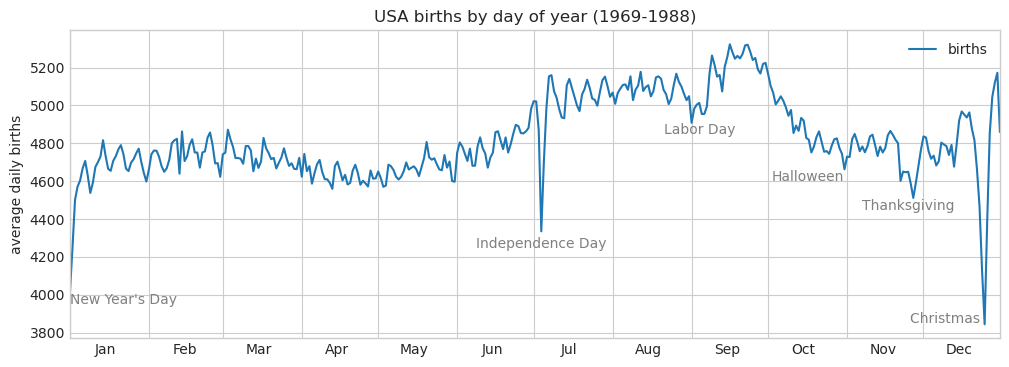

In [25]:
def plot_birds(births_by_date, plot_labels=True):
    
    fig, ax = plt.subplots(figsize=(12, 4))
    births_by_date.plot(ax=ax);
    
    style = dict(size=10, color='gray')

    if plot_labels:
        ax.text('2012-1-1', 3950, "New Year's Day", **style)
        ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
        ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
        ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
        ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
        ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

        # Label the axes
        ax.set(title='USA births by day of year (1969-1988)',
               ylabel='average daily births')

        # Format the x axis with centered month labels
        ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
        ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

    
plot_birds(births_by_date)

````{tip}
Functions in Python support a very simple self-documenting description that we can add immediately after we define the function. These are called docstrings. 
```python
def foo():
    """
    Here is where my little piece of documentation goes. 
    """
    return None
```
You can later access the information inside the docstrings by using `foo.__doc__`. How to write good docstring? As you can imagined, there is a standard way of writing good docstrings, called [PEP 257](https://peps.python.org/pep-0257/).
````

## Moving code outside the notebook

Now, this is fine, but the problem is what do we do when we want to move code outside the notebook. This is useful when we want to clean code from our notebook but also because we may be interested in reading this function from a new different notebook or script. 

* Create a file called `utils.py` in the same location where you have the notebook. Move the function `plot_births()` inside that script and add the right libraries to this code to run on the top of the script. 

We can now import the code inside `utils.py` to our notebook with

In [ ]:
import utils

utils.plot_births()

````{tip}
When moving code to scripts, it is useful to have a command for re-loading the code in the scripts in case we made changes. If we don't do this, unless we restart the kernel we are no going to see the new changes reflected after the import. One way of doing this is by doing the import with `imp`:
```python
import imp
imp.reload(utils)
```
````

## Libraries

What we have created is called a _module_. In practice, this is just a Python script with a lot of functions defined inside. Each one of these files is what we call a module. A library is a collection of these modules, which can be imported all together. 

Let's create a new script/module called `texttools.py`, that has some new functions we are going to use and complement the ones in `utils.py`. Instead of doing a double import statement of the form 
```python
import utils, texttools
```
How to go from a collection of modules to a package? This is surprisingly simple in Python. We create a new folder with the name of the library, let's call it `birthtools` and let's add the two modules (`utils` and `texttools`) inside this folder. We can now import the modules with
```python
import birthtools.utils
```
The second step is to create a new file called `__init__.py` that we can use to import and manipulate all these modules. The simple existence of this file indicates that the folder `birthtools` is a library. A very simple content for `__init__.py` is
```
from .utils import *
from .texttools import *
```
In a sense, the `__init__.py` serves as a index of your library. Once the `__init__.py` has been created, we can import the modules with the following syntax
```python
from birthtools import utils, texttools
```